I couldn't find the according data that have seperately labeled test data, so I split the data into train and test.

### 1. Dataset: German Statlog Credit Data
My first data is German Statlog Credit Data. It is a binary classification ("good" or "bad") to a regression problem. The data size is 1000x21. I directly imported the data from UCI.
Link to data: https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data

**Variable describtion from the website**
Attribute 1:  (qualitative)      
 Status of existing checking account
             A11 :      ... <    0 DM
	       A12 : 0 <= ... <  200 DM
	       A13 :      ... >= 200 DM / salary assignments for at least 1 year
               A14 : no checking account

Attribute 2:  (numerical)
	      Duration in month

Attribute 3:  (qualitative)
	      Credit history
	      A30 : no credits taken/ all credits paid back duly
              A31 : all credits at this bank paid back duly
	      A32 : existing credits paid back duly till now
              A33 : delay in paying off in the past
	      A34 : critical account/  other credits existing (not at this bank)

Attribute 4:  (qualitative)
	      Purpose
	      A40 : car (new)
	      A41 : car (used)
	      A42 : furniture/equipment
	      A43 : radio/television
	      A44 : domestic appliances
	      A45 : repairs
	      A46 : education
	      A47 : (vacation - does not exist?)
	      A48 : retraining
	      A49 : business
	      A410 : others

Attribute 5:  (numerical)
	      Credit amount

Attibute 6:  (qualitative)
	      Savings account/bonds
	      A61 :          ... <  100 DM
	      A62 :   100 <= ... <  500 DM
	      A63 :   500 <= ... < 1000 DM
	      A64 :          .. >= 1000 DM
              A65 :   unknown/ no savings account

Attribute 7:  (qualitative)
	      Present employment since
	      A71 : unemployed
	      A72 :       ... < 1 year
	      A73 : 1  <= ... < 4 years  
	      A74 : 4  <= ... < 7 years
	      A75 :       .. >= 7 years

Attribute 8:  (numerical)
	      Installment rate in percentage of disposable income

Attribute 9:  (qualitative)
	      Personal status and sex
	      A91 : male   : divorced/separated
	      A92 : female : divorced/separated/married
              A93 : male   : single
	      A94 : male   : married/widowed
	      A95 : female : single

Attribute 10: (qualitative)
	      Other debtors / guarantors
	      A101 : none
	      A102 : co-applicant
	      A103 : guarantor

Attribute 11: (numerical)
	      Present residence since

Attribute 12: (qualitative)
	      Property
	      A121 : real estate
	      A122 : if not A121 : building society savings agreement/ life insurance
              A123 : if not A121/A122 : car or other, not in attribute 6
	      A124 : unknown / no property

Attribute 13: (numerical)
	      Age in years

Attribute 14: (qualitative)
	      Other installment plans 
	      A141 : bank
	      A142 : stores
	      A143 : none

Attribute 15: (qualitative)
	      Housing
	      A151 : rent
	      A152 : own
	      A153 : for free

Attribute 16: (numerical)
              Number of existing credits at this bank

Attribute 17: (qualitative)
	      Job
	      A171 : unemployed/ unskilled  - non-resident
	      A172 : unskilled - resident
	      A173 : skilled employee / official
	      A174 : management/ self-employed/
		     highly qualified employee/ officer

Attribute 18: (numerical)
	      Number of people being liable to provide maintenance for

Attribute 19: (qualitative)
	      Telephone
	      A191 : none
	      A192 : yes, registered under the customers name

Attribute 20: (qualitative)
	      foreign worker
	      A201 : yes
	      A202 : no
          

In [125]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [126]:
###GERMAN STATLOG DATA


from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 
  
# metadata 
print(statlog_german_credit_data.metadata) 
  
# variable information 
print(statlog_german_credit_data.variables) 


{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

I processed the categorical columns with one hot encoding.

In [130]:
##GERMAN STATLOG NN


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# cat_columns contains the indices of categorical columns in your dataset
cat_columns = [0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16]  #  categorical columns

# Preprocessing pipeline to handle categorical columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cat_columns)
    ])

# Transform your data using the preprocessor
X_processed = preprocessor.fit_transform(X)
y = y.ravel()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# List of n_neighbors values to experiment with
n_neighbors_values = list(range(1, 36))  # Adjust or expand as needed

best_accuracy_euclidean = 0
best_accuracy_manhattan = 0
best_neighbors_euclidean = 0
best_neighbors_manhattan = 0

for n_neighbors in n_neighbors_values:
    # Create K-Nearest Neighbors classifiers with different distance metrics
    euclidean_classifier = KNeighborsClassifier(n_neighbors=n_neighbors, metric='euclidean')
    manhattan_classifier = KNeighborsClassifier(n_neighbors=n_neighbors, metric='manhattan')

    # Fit and score on the training data using cross-validation
    euclidean_scores = cross_val_score(euclidean_classifier, X_train, y_train, cv=5)
    manhattan_scores = cross_val_score(manhattan_classifier, X_train, y_train, cv=5)

    # Calculate average accuracy across folds
    avg_accuracy_euclidean = np.mean(euclidean_scores)
    avg_accuracy_manhattan = np.mean(manhattan_scores)

    if avg_accuracy_euclidean > best_accuracy_euclidean:
        best_accuracy_euclidean = avg_accuracy_euclidean
        best_neighbors_euclidean = n_neighbors

    if avg_accuracy_manhattan > best_accuracy_manhattan:
        best_accuracy_manhattan = avg_accuracy_manhattan
        best_neighbors_manhattan = n_neighbors

# Fit the best models on the entire training set
best_euclidean_classifier = KNeighborsClassifier(n_neighbors=best_neighbors_euclidean, metric='euclidean')
best_manhattan_classifier = KNeighborsClassifier(n_neighbors=best_neighbors_manhattan, metric='manhattan')

best_euclidean_classifier.fit(X_train, y_train)
best_manhattan_classifier.fit(X_train, y_train)

# Evaluate on the test set
test_accuracy_euclidean = best_euclidean_classifier.score(X_test, y_test)
test_accuracy_manhattan = best_manhattan_classifier.score(X_test, y_test)

print(f"Best neighbors for Euclidean distance: {best_neighbors_euclidean}, Train set accuracy:{best_accuracy_euclidean:.4f}, Test Set Accuracy: {test_accuracy_euclidean:.4f}")
print(f"Best neighbors for Manhattan distance: {best_neighbors_manhattan},Train set accuracy:{best_accuracy_manhattan:.4f}, Test Set Accuracy: {test_accuracy_manhattan:.4f}")


Best neighbors for Euclidean distance: 12, Train set accuracy:0.7288, Test Set Accuracy: 0.7350
Best neighbors for Manhattan distance: 12,Train set accuracy:0.7288, Test Set Accuracy: 0.7350


Test accuracy is close but a little bit higher. Also, distnace metric isn't effective with this data. (I checked with other k values too.)

In [132]:
#GERMAN STATLOG  DECISION TREE

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np


cat_columns = [0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16]  # categorical columns

# Preprocessing pipeline to handle categorical columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cat_columns)
    ])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of min_samples_leaf values to experiment with
min_samples_leaf_values = [1, 5, 10, 20, 25, 30]  # You can adjust these values

best_avg_accuracy = 0
best_min_samples_leaf = 0


for min_samples_leaf in min_samples_leaf_values:
    # Combine preprocessing with the classifier
    clf = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=42))
    ])

    # Perform cross-validation on the training data with 5 folds
    scores = cross_val_score(clf, X_train, y_train, cv=5)

    # Calculate average accuracy across folds
    avg_accuracy = np.mean(scores)

    if avg_accuracy > best_avg_accuracy:
        best_avg_accuracy = avg_accuracy
        best_min_samples_leaf = min_samples_leaf

# Fit the best model on the entire training set
best_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(min_samples_leaf=best_min_samples_leaf,  random_state=42))
])

best_model.fit(X_train, y_train)

# Evaluate on the test set
test_accuracy = best_model.score(X_test, y_test)

print(f"Best min_samples_leaf={best_min_samples_leaf}, Train set accuracy:{best_avg_accuracy:.4f} Test Set Accuracy: {test_accuracy:.4f}")


Best min_samples_leaf=20, Train set accuracy:0.7112 Test Set Accuracy: 0.7200


In [135]:
#GERMAN STATLOG RF

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Assuming X contains features and y contains target variable

# Assuming cat_columns contains the indices of categorical columns in your dataset
cat_columns = [0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16]  # Replace with your actual categorical columns

# Preprocessing pipeline to handle categorical columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cat_columns)
    ])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of max_features values to experiment with
max_features_values = [ 0.3, 0.4, 0.5, 0.6, 0.7]  # You can adjust or expand these values

best_avg_accuracy = 0
best_max_features = 0

for max_feature in max_features_values:
    # Combine preprocessing with the classifier
    clf = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=500, min_samples_leaf=5, max_features=max_feature, random_state=42))
    ])

    # Perform cross-validation on the training data with 5 folds
    scores = cross_val_score(clf, X_train, y_train, cv=5)

    # Calculate average accuracy across folds
    avg_accuracy = np.mean(scores)

    if avg_accuracy > best_avg_accuracy:
        best_avg_accuracy = avg_accuracy
        best_max_features = max_feature

# Fit the best model on the entire training set
best_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=500, min_samples_leaf=5, max_features=best_max_features, random_state=42))
])

best_model.fit(X_train, y_train)

# Evaluate on the test set
test_accuracy = best_model.score(X_test, y_test)

print(f"Best max_features={best_max_features}, Train set accuracy:{best_avg_accuracy: .4f}, Test Set Accuracy: {test_accuracy:.4f}")


Best max_features=0.4, Train set accuracy: 0.7400, Test Set Accuracy: 0.7450


In [136]:
##GERMAN STATLOG GBT

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Assuming X contains features and y contains target variable

# Assuming cat_columns contains the indices of categorical columns in your dataset
cat_columns = [0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16]  # Replace with your actual categorical columns

# Preprocessing pipeline to handle categorical columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cat_columns)
    ])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine preprocessing with the classifier
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Parameter grid for hyperparameter tuning
param_grid = {
    'classifier__max_depth': [3, 5, 7],  # Adjust the depth values
    'classifier__n_estimators': [50, 100, 200],  # Adjust the number of trees
    'classifier__learning_rate': [0.1, 0.01, 0.001]  # Adjust the learning rate
}

# GridSearchCV with cross-validation on the training set
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")

# Evaluate the best model on the test set
test_score = grid_search.score(X_test, y_test)
print(f"Test Set Score: {test_score:.4f}")


Best Parameters: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}
Best Cross-Validation Score: 0.7350
Test Set Score: 0.7300


In all methods, test and train accuracies, also model's accuracies are close. The best result is given by Random forest.

### 2. dataset: IEEE New England 39-bus test case: Dataset for the Transient Stability Assessment
Data link:https://zenodo.org/records/7350829
Data size: 3120 x350
The data is binary classification. All data is numeric. Data consist of speed, angle, voltage etc. values and it predicts if the system is stable or not. It also has class imbalance. (less than 20% of the data is unstable) 

**Data variables describtion from the website:**
WmGx - rotor speed for each generator Gx, from G1 to G10,
DThetaGx - rotor angle deviation for each generator Gx, from G1 to G10,
ThetaGx - rotor mechanical angle for each generator Gx, from G1 to G10,
VtGx - stator voltage for each generator Gx, from G1 to G10,
IdGx - stator d-component current for each generator Gx, from G1 to G10,
IqGx - stator q-component current for each generator Gx, from G1 to G10,
LAfvGx - pre-fault power load angle for each generator Gx, from G1 to G10,
LAlvGx - post-fault power load angle for each generator Gx, from G1 to G10,
PfvGx - pre-falut value of the generator active power for each generator Gx, from G1 to G10,
PlvGx - post-falut value of the generator active power for each generator Gx, from G1 to G10,
QfvGx - pre-falut value of the generator reactive power for each generator Gx, from G1 to G10,
QlvGx - post-falut value of the generator reactive power for each generator Gx, from G1 to G10,
VAfvBx - pre-fault bus voltage magnitude in phase A for each bus Bx, from B1 to B39,
VBfvBx - pre-fault bus voltage magnitude in phase B for each bus Bx, from B1 to B39,
VCfvBx - pre-fault bus voltage magnitude in phase C for each bus Bx, from B1 to B39,
VAlvBx - post-fault bus voltage magnitude in phase A for each bus Bx, from B1 to B39,
VBlvBx - post-fault bus voltage magnitude in phase B for each bus Bx, from B1 to B39,
VClvBx - post-fault bus voltage magnitude in phase C for each bus Bx, from B1 to B39,
Stability - binary indicator (0/1) that determines if the power system was stable or unstable (0 - stable, 1 - unstable); this is the label variable.

In [30]:
##POWER GRID FEATURES

import pandas as pd

# Replace 'file_path' with the path to your CSV file
file_path = r'C:\Users\DELL\Downloads\GridDictionary2.csv'
# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify it's been loaded properly
print(data.tail())


        WmG1    WmG2    WmG3    WmG4    WmG5    WmG6    WmG7    WmG8    WmG9  \
3115  1.0021  1.0068  1.0076  1.0122  1.0140  1.0127  1.0128  1.0113  1.0475   
3116  1.0021  1.0068  1.0076  1.0122  1.0139  1.0127  1.0127  1.0113  1.0475   
3117  1.0030  1.0126  1.0255  1.0200  1.0207  1.0201  1.0207  1.0131  1.0157   
3118  1.0013  1.0048  1.0041  1.0048  1.0060  1.0054  1.0050  1.0056  1.0056   
3119  1.0028  1.0120  1.0259  1.0186  1.0193  1.0187  1.0191  1.0122  1.0146   

       WmG10  ...  VAlvB37  VBlvB37  VClvB37  VAlvB38  VBlvB38  VClvB38  \
3115  1.0088  ...  0.66943  0.66943  0.66943  0.43879  0.43879  0.43879   
3116  1.0088  ...  0.67039  0.67039  0.67039  0.43913  0.43913  0.43913   
3117  1.0141  ...  0.91193  0.91193  0.91193  1.00220  1.00220  1.00220   
3118  1.0066  ...  1.02900  1.02900  1.02900  1.07950  1.07950  1.07950   
3119  1.0132  ...  0.93351  0.93351  0.93351  1.01600  1.01600  1.01600   

      VAlvB39  VBlvB39  VClvB39  Stability  
3115  1.00170  1.00170 

In [39]:
##PowerGrid NN


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Assuming your data is loaded into a DataFrame named 'data'
# Extracting features (X) and target (y)
X = data.drop('Stability', axis=1)  # Replace 'target_column_name' with your target column
y = data['Stability']  # Replace 'target_column_name' with your target column

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of n_neighbors values to experiment with
n_neighbors_values = list(range(1, 21))  # Adjust or expand as needed
distances = ['euclidean', 'manhattan']

best_accuracy = 0
best_n_neighbors = None
best_distance = None

for distance in distances:
    for n_neighbors in n_neighbors_values:
        # Create K-Nearest Neighbors classifier
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=distance)
        
        # Perform cross-validation on the training data
        scores = cross_val_score(knn, X_train, y_train, cv=5)
        
        # Calculate average accuracy across folds
        avg_accuracy = scores.mean()
        
        print(f"With {n_neighbors} neighbors, {distance.capitalize()} Distance, Average Accuracy: {avg_accuracy:.4f}")
        
        # Check if this model is the best so far
        if avg_accuracy > best_accuracy:
            best_accuracy = avg_accuracy
            best_n_neighbors = n_neighbors
            best_distance = distance

# Now, train the model on the full training set with the best parameters found
best_knn = KNeighborsClassifier(n_neighbors=best_n_neighbors, metric=best_distance)
best_knn.fit(X_train, y_train)

# Evaluate on the separate test set
test_accuracy = best_knn.score(X_test, y_test)
print(f"Test Accuracy with best parameters (Distance: {best_distance.capitalize()}, Neighbors: {best_n_neighbors}): {test_accuracy:.4f}")



With 1 neighbors, Euclidean Distance, Average Accuracy: 0.9928
With 2 neighbors, Euclidean Distance, Average Accuracy: 0.9824
With 3 neighbors, Euclidean Distance, Average Accuracy: 0.9836
With 4 neighbors, Euclidean Distance, Average Accuracy: 0.9828
With 5 neighbors, Euclidean Distance, Average Accuracy: 0.9852
With 6 neighbors, Euclidean Distance, Average Accuracy: 0.9844
With 7 neighbors, Euclidean Distance, Average Accuracy: 0.9808
With 8 neighbors, Euclidean Distance, Average Accuracy: 0.9780
With 9 neighbors, Euclidean Distance, Average Accuracy: 0.9772
With 10 neighbors, Euclidean Distance, Average Accuracy: 0.9756
With 11 neighbors, Euclidean Distance, Average Accuracy: 0.9784
With 12 neighbors, Euclidean Distance, Average Accuracy: 0.9724
With 13 neighbors, Euclidean Distance, Average Accuracy: 0.9724
With 14 neighbors, Euclidean Distance, Average Accuracy: 0.9724
With 15 neighbors, Euclidean Distance, Average Accuracy: 0.9756
With 16 neighbors, Euclidean Distance, Average Ac

Test is a little better. But overall, all trials gave a very good accuracy score.

In [35]:
##Power Grid Decision tree

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Assuming your data is loaded into a DataFrame named 'data'
# Extracting features (X) and target (y)
X = data.drop('Stability', axis=1)  # Replace 'target_column_name' with your target column
y = data['Stability']  # Replace 'target_column_name' with your target column

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of min_samples_leaf values to experiment with
min_samples_leaf_values = [1, 5, 10, 20, 25, 30]  # Adjust as needed

best_accuracy = 0
best_min_samples_leaf = None

for min_samples_leaf in min_samples_leaf_values:
    # Create Decision Tree Classifier
    clf = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=42)
    
    # Perform cross-validation on the training data
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    
    # Calculate average accuracy across folds
    avg_accuracy = scores.mean()
    
    print(f"With min_samples_leaf={min_samples_leaf}, Average Accuracy: {avg_accuracy:.4f}")
    
    # Check if this model is the best so far
    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_min_samples_leaf = min_samples_leaf

# Now, train the model on the full training set with the best parameter found
best_clf = DecisionTreeClassifier(min_samples_leaf=best_min_samples_leaf, random_state=42)
best_clf.fit(X_train, y_train)

# Evaluate on the separate test set
test_accuracy = best_clf.score(X_test, y_test)
print(f"Test Accuracy with best min_samples_leaf={best_min_samples_leaf}: {test_accuracy:.4f}")


With min_samples_leaf=1, Average Accuracy: 0.9904
With min_samples_leaf=5, Average Accuracy: 0.9864
With min_samples_leaf=10, Average Accuracy: 0.9864
With min_samples_leaf=20, Average Accuracy: 0.9816
With min_samples_leaf=25, Average Accuracy: 0.9756
With min_samples_leaf=30, Average Accuracy: 0.9768
Test Accuracy with best min_samples_leaf=1: 0.9920


In [43]:
##POWER GRID RF
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming your data is loaded into a DataFrame named 'data'
# Extracting features (X) and target (y)
X = data.drop('Stability', axis=1)  # Replace 'target_column_name' with your target column
y = data['Stability']  # Replace 'target_column_name' with your target column

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of max_features values to experiment with
max_features_values = [ 0.3, 0.4, 0.5, 0.6, 0.7]  # Adjust or expand as needed

best_accuracy = 0
best_max_features = None

for max_feature in max_features_values:
    # Create Random Forest Classifier
    rf = RandomForestClassifier(n_estimators=500, min_samples_leaf=5, max_features=max_feature, random_state=42)
    
    # Perform cross-validation on the training data
    scores = cross_val_score(rf, X_train, y_train, cv=5)
    
    # Calculate average accuracy across folds
    avg_accuracy = scores.mean()
    
    print(f"With max_features={max_feature}, Average Accuracy: {avg_accuracy:.4f}")
    
    # Check if this model is the best so far
    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_max_features = max_feature

# Train the model on the full training set with the best max_features found
best_rf = RandomForestClassifier(n_estimators=500, min_samples_leaf=5, max_features=best_max_features, random_state=42)
best_rf.fit(X_train, y_train)

# Evaluate on the separate test set
test_accuracy = best_rf.score(X_test, y_test)
print(f"Test Accuracy with best max_features={best_max_features}: {test_accuracy:.4f}")

With max_features=0.3, Average Accuracy: 0.9932
With max_features=0.4, Average Accuracy: 0.9928
With max_features=0.5, Average Accuracy: 0.9936
With max_features=0.6, Average Accuracy: 0.9936
With max_features=0.7, Average Accuracy: 0.9936
Test Accuracy with best max_features=0.5: 0.9904


In [87]:
##POWER GRID GBT
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],  # Learning rate values to try
    'n_estimators': [100, 200],  # Number of trees to try
    'max_depth': [3, 5, 7]  # Depth of trees to try
}

#since the data is large, code runs for too long when i tried for 5 alternatives each

# Create the Gradient Boosting Classifier
gbt = GradientBoostingClassifier(random_state=42)

# Use GridSearchCV to search for the best parameters
grid_search = GridSearchCV(gbt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)  # Using the training set for tuning

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-validation Accuracy:", best_score)

# Get the best model based on the best parameters
best_gbt = grid_search.best_estimator_

# Evaluate the best model on the test set
test_accuracy = best_gbt.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)




Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best Cross-validation Accuracy: 0.7858153733048849
Test Set Accuracy: 0.7694915254237288


Train and test results are very close in all of them but GBT. In GBT, the results are much lower than the other 3. Other than GBT, the others gave very high scores of accuracy. The best results are obtained by NN.

In [63]:
##Student dropout

import pandas as pd

# Replace 'file_path' with the path to your CSV file
file_path = r'C:\Users\DELL\Downloads\studentdropout.xlsx'
# Read the CSV file into a DataFrame
data = pd.read_excel(file_path)

# Display the first few rows of the DataFrame to verify it's been loaded properly
print(data.tail())

      Marital status  Application mode  Application order  Course  \
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance\t  Previous qualification  \
4419                             1                       1   
4420                             1                       1   
4421                             1                       1   
4422                             1                       1   
4423                             1                       1   

      Previous qualification (grade)  Nacionality  Mother's qualification  \
4419                           125.0            1                       1   
4420                           120.0          105         

### 3. Dataset: Predict students' dropout and academic success 
Data link:https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success
Data size:  4424 x36
 This is a multiclassification case where the target is student's status and has 3 values: "Dropout, "Enrolled" and "Graduate". 
 
**Variables:**
*Describtions can be found in the website, it is too long to copy here*
 Marital status
Application mode
Application order
Course
"Daytime/evening attendance	"
Previous qualification
Previous qualification (grade)
Nacionality
Mother's qualification
Father's qualification
Mother's occupation
Father's occupation
Admission grade
Displaced
Educational special needs
Debtor
Tuition fees up to date
Gender
Scholarship holder
Age at enrollment
International
Curricular units 1st sem (credited)
Curricular units 1st sem (enrolled)
Curricular units 1st sem (evaluations)
Curricular units 1st sem (approved)
Curricular units 1st sem (grade)
Curricular units 1st sem (without evaluations)
Curricular units 2nd sem (credited)
Curricular units 2nd sem (enrolled)
Curricular units 2nd sem (evaluations)
Curricular units 2nd sem (approved)
Curricular units 2nd sem (grade)
Curricular units 2nd sem (without evaluations)
Unemployment rate
Inflation rate
GDP
Status
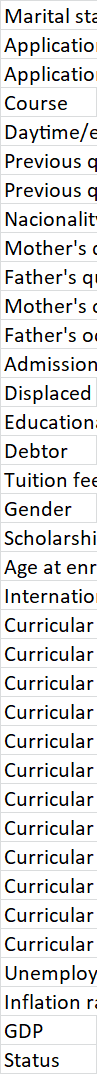


In [76]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming 'Target' contains your categorical labels
# Replace 'data['Target']' with your actual target column
target_values = ["dropout", "enrolled", "graduate"]  # Define your categorical values in order

# Creating a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit LabelEncoder and transform the target column
data['Status'] = label_encoder.fit_transform(data['Status'])



In [82]:
#Student dropout NN

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Assuming your data is loaded into a DataFrame named 'data'
# Extracting features (X) and target (y)
X = data.drop('Status', axis=1)  # Replace 'target_column_name' with your target column
y = data['Status']  # Replace 'target_column_name' with your target column

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of n_neighbors values to experiment with
n_neighbors_values = list(range(1, 21))  # Adjust or expand as needed
distances = ['euclidean', 'manhattan']

best_accuracy = 0
best_n_neighbors = None
best_distance = None

for distance in distances:
    for n_neighbors in n_neighbors_values:
        # Create K-Nearest Neighbors classifier
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=distance)
        
        # Perform cross-validation on the training data
        scores = cross_val_score(knn, X_train, y_train, cv=5)
        
        # Calculate average accuracy across folds
        avg_accuracy = scores.mean()
        
        print(f"With {n_neighbors} neighbors, {distance.capitalize()} Distance, Average Accuracy: {avg_accuracy:.4f}")
        
        # Check if this model is the best so far
        if avg_accuracy > best_accuracy:
            best_accuracy = avg_accuracy
            best_n_neighbors = n_neighbors
            best_distance = distance

# Now, train the model on the full training set with the best parameters found
best_knn = KNeighborsClassifier(n_neighbors=best_n_neighbors, metric=best_distance)
best_knn.fit(X_train, y_train)

# Evaluate on the separate test set
test_accuracy = best_knn.score(X_test, y_test)
print(f"Test Accuracy with best parameters (Distance: {best_distance.capitalize()}, Neighbors: {best_n_neighbors}): {test_accuracy:.4f}")


#best: With 12 neighbors, Manhattan Distance, Average Accuracy: 0.6626 & With 18 neighbors, Manhattan Distance, Average Accuracy: 0.6626

With 1 neighbors, Euclidean Distance, Average Accuracy: 0.5535
With 2 neighbors, Euclidean Distance, Average Accuracy: 0.5230
With 3 neighbors, Euclidean Distance, Average Accuracy: 0.5829
With 4 neighbors, Euclidean Distance, Average Accuracy: 0.5793
With 5 neighbors, Euclidean Distance, Average Accuracy: 0.5894
With 6 neighbors, Euclidean Distance, Average Accuracy: 0.5965
With 7 neighbors, Euclidean Distance, Average Accuracy: 0.6027
With 8 neighbors, Euclidean Distance, Average Accuracy: 0.6081
With 9 neighbors, Euclidean Distance, Average Accuracy: 0.6041
With 10 neighbors, Euclidean Distance, Average Accuracy: 0.6078
With 11 neighbors, Euclidean Distance, Average Accuracy: 0.6033
With 12 neighbors, Euclidean Distance, Average Accuracy: 0.6075
With 13 neighbors, Euclidean Distance, Average Accuracy: 0.6007
With 14 neighbors, Euclidean Distance, Average Accuracy: 0.6016
With 15 neighbors, Euclidean Distance, Average Accuracy: 0.6024
With 16 neighbors, Euclidean Distance, Average Ac

In [83]:
#Student dropout Decision tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
import pandas as pd



# List of min_samples_leaf values to experiment with
min_samples_leaf_values = [1, 5, 10, 20, 25, 30]  # Adjust as needed

best_accuracy = 0
best_min_samples_leaf = None

for min_samples_leaf in min_samples_leaf_values:
    # Create Decision Tree Classifier
    clf = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=42)
    
    # Perform cross-validation on the training data
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    
    # Calculate average accuracy across folds
    avg_accuracy = scores.mean()
    
    print(f"With min_samples_leaf={min_samples_leaf}, Average Accuracy: {avg_accuracy:.4f}")
    
    # Check if this model is the best so far
    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_min_samples_leaf = min_samples_leaf

# Now, train the model on the full training set with the best parameter found
best_clf = DecisionTreeClassifier(min_samples_leaf=best_min_samples_leaf, random_state=42)
best_clf.fit(X_train, y_train)

# Evaluate on the separate test set
test_accuracy = best_clf.score(X_test, y_test)
print(f"Test Accuracy with best min_samples_leaf={best_min_samples_leaf}: {test_accuracy:.4f}")


With min_samples_leaf=1, Average Accuracy: 0.6844
With min_samples_leaf=5, Average Accuracy: 0.7152
With min_samples_leaf=10, Average Accuracy: 0.7234
With min_samples_leaf=20, Average Accuracy: 0.7479
With min_samples_leaf=25, Average Accuracy: 0.7550
With min_samples_leaf=30, Average Accuracy: 0.7494
Test Accuracy with best min_samples_leaf=25: 0.7311


In [84]:
#Student dropout RF

# List of max_features values to experiment with
max_features_values = [ 0.3, 0.4, 0.5, 0.6, 0.7]  # Adjust or expand as needed

best_accuracy = 0
best_max_features = None

for max_feature in max_features_values:
    # Create Random Forest Classifier
    rf = RandomForestClassifier(n_estimators=500, min_samples_leaf=5, max_features=max_feature, random_state=42)
    
    # Perform cross-validation on the training data
    scores = cross_val_score(rf, X_train, y_train, cv=5)
    
    # Calculate average accuracy across folds
    avg_accuracy = scores.mean()
    
    print(f"With max_features={max_feature}, Average Accuracy: {avg_accuracy:.4f}")
    
    # Check if this model is the best so far
    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_max_features = max_feature

# Train the model on the full training set with the best max_features found
best_rf = RandomForestClassifier(n_estimators=500, min_samples_leaf=5, max_features=best_max_features, random_state=42)
best_rf.fit(X_train, y_train)

# Evaluate on the separate test set
test_accuracy = best_rf.score(X_test, y_test)
print(f"Test Accuracy with best max_features={best_max_features}: {test_accuracy:.4f}")

With max_features=0.3, Average Accuracy: 0.7708
With max_features=0.4, Average Accuracy: 0.7706
With max_features=0.5, Average Accuracy: 0.7742
With max_features=0.6, Average Accuracy: 0.7751
With max_features=0.7, Average Accuracy: 0.7754
Test Accuracy with best max_features=0.7: 0.7571


In [86]:
#Student dropout GBT

# Define the parameter grid for tuning
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],  # Learning rate values to try
    'n_estimators': [100, 200],  # Number of trees to try
    'max_depth': [3, 5, 7]  # Depth of trees to try
}

#since the data is large, code runs for too long when i tried for 5 alternatives each

# Create the Gradient Boosting Classifier
gbt = GradientBoostingClassifier(random_state=42)

# Use GridSearchCV to search for the best parameters
grid_search = GridSearchCV(gbt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)  # Using the training set for tuning

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-validation Accuracy:", best_score)

# Get the best model based on the best parameters
best_gbt = grid_search.best_estimator_

# Evaluate the best model on the test set
test_accuracy = best_gbt.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best Cross-validation Accuracy: 0.7858153733048849
Test Set Accuracy: 0.7694915254237288


In all of the methods, test results are worse by nearly 0.02. It might be a case of overfitting. The best resukts are obtained with GBT method.

### 4. Dataset Breast Cancer Diagnosis

Data link:ttps://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic 
Data size: 569 x30 

In [89]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [90]:

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

In [93]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming 'y' contains your categorical labels 'M' and 'B'
# Replace 'y' with your actual target variable
label_encoder = LabelEncoder()

y = np.ravel(y)

# Fit LabelEncoder and transform the target column
y = label_encoder.fit_transform(y)

# Now 'y_encoded' contains the encoded values (0 and 1)


In [101]:


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# List of n_neighbors values to experiment with
n_neighbors_values = list(range(1, 21))  # Adjust or expand as needed
distances = ['euclidean', 'manhattan']

best_accuracy = 0
best_n_neighbors = None
best_distance = None

for distance in distances:
    for n_neighbors in n_neighbors_values:
        # Create K-Nearest Neighbors classifier
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=distance)
        
        # Perform cross-validation on the training data
        scores = cross_val_score(knn, X_train, y_train, cv=5)
        
        # Calculate average accuracy across folds
        avg_accuracy = scores.mean()
        
        print(f"With {n_neighbors} neighbors, {distance.capitalize()} Distance, Average Accuracy: {avg_accuracy:.4f}")
        
        # Check if this model is the best so far
        if avg_accuracy > best_accuracy:
            best_accuracy = avg_accuracy
            best_n_neighbors = n_neighbors
            best_distance = distance

# Now, train the model on the full training set with the best parameters found
best_knn = KNeighborsClassifier(n_neighbors=best_n_neighbors, metric=best_distance)
best_knn.fit(X_train, y_train)

# Evaluate on the separate test set
test_accuracy = best_knn.score(X_test, y_test)
print(f"Test Accuracy with best parameters (Distance: {best_distance.capitalize()}, Neighbors: {best_n_neighbors}): {test_accuracy:.4f}")

With 1 neighbors, Euclidean Distance, Average Accuracy: 0.9143
With 2 neighbors, Euclidean Distance, Average Accuracy: 0.9209
With 3 neighbors, Euclidean Distance, Average Accuracy: 0.9209
With 4 neighbors, Euclidean Distance, Average Accuracy: 0.9209
With 5 neighbors, Euclidean Distance, Average Accuracy: 0.9231
With 6 neighbors, Euclidean Distance, Average Accuracy: 0.9143
With 7 neighbors, Euclidean Distance, Average Accuracy: 0.9253
With 8 neighbors, Euclidean Distance, Average Accuracy: 0.9165
With 9 neighbors, Euclidean Distance, Average Accuracy: 0.9275
With 10 neighbors, Euclidean Distance, Average Accuracy: 0.9143
With 11 neighbors, Euclidean Distance, Average Accuracy: 0.9143
With 12 neighbors, Euclidean Distance, Average Accuracy: 0.9187
With 13 neighbors, Euclidean Distance, Average Accuracy: 0.9143
With 14 neighbors, Euclidean Distance, Average Accuracy: 0.9143
With 15 neighbors, Euclidean Distance, Average Accuracy: 0.9143
With 16 neighbors, Euclidean Distance, Average Ac

In [104]:

# List of min_samples_leaf values to experiment with
min_samples_leaf_values = [1, 5, 10, 20, 25, 30]  # Adjust as needed

best_accuracy = 0
best_min_samples_leaf = None

for min_samples_leaf in min_samples_leaf_values:
    # Create Decision Tree Classifier
    clf = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=42)
    
    # Perform cross-validation on the training data
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    
    # Calculate average accuracy across folds
    avg_accuracy = scores.mean()
    
    print(f"With min_samples_leaf={min_samples_leaf}, Average Accuracy: {avg_accuracy:.4f}")
    
    # Check if this model is the best so far
    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_min_samples_leaf = min_samples_leaf

# Now, train the model on the full training set with the best parameter found
best_clf = DecisionTreeClassifier(min_samples_leaf=best_min_samples_leaf, random_state=42)
best_clf.fit(X_train, y_train)

# Evaluate on the separate test set
test_accuracy = best_clf.score(X_test, y_test)
print(f"Test Accuracy with best min_samples_leaf={best_min_samples_leaf}: {test_accuracy:.4f}")

With min_samples_leaf=1, Average Accuracy: 0.9165
With min_samples_leaf=5, Average Accuracy: 0.9319
With min_samples_leaf=10, Average Accuracy: 0.9143
With min_samples_leaf=20, Average Accuracy: 0.9077
With min_samples_leaf=25, Average Accuracy: 0.9077
With min_samples_leaf=30, Average Accuracy: 0.9033
Test Accuracy with best min_samples_leaf=5: 0.9561


In [102]:
# List of max_features values to experiment with
max_features_values = [ 0.3, 0.4, 0.5, 0.6, 0.7]  # Adjust or expand as needed

best_accuracy = 0
best_max_features = None

for max_feature in max_features_values:
    # Create Random Forest Classifier
    rf = RandomForestClassifier(n_estimators=500, min_samples_leaf=5, max_features=max_feature, random_state=42)
    
    # Perform cross-validation on the training data
    scores = cross_val_score(rf, X_train, y_train, cv=5)
    
    # Calculate average accuracy across folds
    avg_accuracy = scores.mean()
    
    print(f"With max_features={max_feature}, Average Accuracy: {avg_accuracy:.4f}")
    
    # Check if this model is the best so far
    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_max_features = max_feature

# Train the model on the full training set with the best max_features found
best_rf = RandomForestClassifier(n_estimators=500, min_samples_leaf=5, max_features=best_max_features, random_state=42)
best_rf.fit(X_train, y_train)

# Evaluate on the separate test set
test_accuracy = best_rf.score(X_test, y_test)
print(f"Test Accuracy with best max_features={best_max_features}: {test_accuracy:.4f}")

With max_features=0.3, Average Accuracy: 0.9560
With max_features=0.4, Average Accuracy: 0.9582
With max_features=0.5, Average Accuracy: 0.9538
With max_features=0.6, Average Accuracy: 0.9560
With max_features=0.7, Average Accuracy: 0.9538
Test Accuracy with best max_features=0.4: 0.9561


In [105]:

# Define the parameter grid for tuning
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],  # Learning rate values to try
    'n_estimators': [100, 200],  # Number of trees to try
    'max_depth': [3, 5, 7]  # Depth of trees to try
}

#since the data is large, code runs for too long when i tried for 5 alternatives each

# Create the Gradient Boosting Classifier
gbt = GradientBoostingClassifier(random_state=42)

# Use GridSearchCV to search for the best parameters
grid_search = GridSearchCV(gbt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)  # Using the training set for tuning

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-validation Accuracy:", best_score)

# Get the best model based on the best parameters
best_gbt = grid_search.best_estimator_

# Evaluate the best model on the test set
test_accuracy = best_gbt.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best Cross-validation Accuracy: 0.9648351648351647
Test Set Accuracy: 0.956140350877193


Although train accuracies are different, test results of RF, DT and GBT are the same and higher than NN method.

### DATA5 Personality classification Data: 16 Personalities
Data link: https://www.kaggle.com/datasets/anshulmehtakaggl/60k-responses-of-16-personalities-test-mbt?select=16P.csv
Data size: 60,000 x62
It has different questions asked in the 16P personality test (variables/columns); answers are like : Fully Agree: 3
Partially Agree: 2
Slightly Agree: 1
neutral -> 0
Slightly disagree: -1
Partially disagree: -2
Fully disagree: -3
I encoded the 16 personalities as 0, 1, 2.., 16.

In [137]:
import pandas as pd

# Replace 'file_path' with the path to your CSV file
file_path = r'C:\Users\DELL\Downloads\personality.csv'
# Read the CSV file into a DataFrame
data = pd.read_csv(file_path, encoding='latin-1')



In [115]:
data

,Response Id,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,-1,0,0,0,0,0,ENFP
1,1,0,0,-2,-3,-1,2,-2,0,3,...,0,-2,0,2,0,-1,-1,-1,3,ISFP
2,2,0,0,2,0,-1,2,0,0,1,...,0,2,0,2,-1,0,1,2,1,INFJ
3,3,0,-1,3,-1,0,0,-2,0,-2,...,0,0,-1,-1,0,1,0,-2,-1,ISTP
4,4,0,0,-1,0,2,-1,-2,0,1,...,0,1,0,2,0,1,-1,2,-1,ENFJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,59994,0,-1,0,-3,-2,2,1,0,1,...,0,2,0,1,0,0,2,3,3,INFJ
59995,59995,0,0,-2,1,3,0,-3,0,2,...,0,1,0,0,0,0,2,0,-2,ESTP
59996,59996,0,0,1,0,-2,-2,0,0,-1,...,-1,2,0,-3,0,1,-1,0,-1,ISTP
59997,59997,0,0,1,-1,-2,-1,2,0,1,...,0,2,0,2,0,0,0,1,0,ISTJ


In [138]:

# Assuming your data is loaded into a DataFrame named 'data'
# Extracting features (X) and target (y)
X = data.drop('Personality', axis=1)  # Replace 'target_column_name' with your target column
y = data['Personality']  # Replace 'target_column_name' with your target column
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming 'y' contains your categorical labels 'M' and 'B'
# Replace 'y' with your actual target variable
label_encoder = LabelEncoder()

y = np.ravel(y)

# Fit LabelEncoder and transform the target column
y = label_encoder.fit_transform(y)

# Now 'y_encoded' contains the encoded values (0 and 1)

# Split the data into training and test sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
# List of n_neighbors values to experiment with
n_neighbors_values = [5 ,10 ,15, 20, 25]  # Adjust or expand as needed
distances = ['euclidean', 'manhattan']

best_accuracy = 0
best_n_neighbors = None
best_distance = None

for distance in distances:
    for n_neighbors in n_neighbors_values:
        # Create K-Nearest Neighbors classifier
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=distance)
        
        # Perform cross-validation on the training data
        scores = cross_val_score(knn, X_train, y_train, cv=5)
        
        # Calculate average accuracy across folds
        avg_accuracy = scores.mean()
        
        print(f"With {n_neighbors} neighbors, {distance.capitalize()} Distance, Average Accuracy: {avg_accuracy:.4f}")
        
        # Check if this model is the best so far
        if avg_accuracy > best_accuracy:
            best_accuracy = avg_accuracy
            best_n_neighbors = n_neighbors
            best_distance = distance

# Now, train the model on the full training set with the best parameters found
best_knn = KNeighborsClassifier(n_neighbors=best_n_neighbors, metric=best_distance)
best_knn.fit(X_train, y_train)

# Evaluate on the separate test set
test_accuracy = best_knn.score(X_test, y_test)
print(f"Test Accuracy with best parameters (Distance: {best_distance.capitalize()}, Neighbors: {best_n_neighbors}): {test_accuracy:.4f}")

With 5 neighbors, Euclidean Distance, Average Accuracy: 0.1218
With 10 neighbors, Euclidean Distance, Average Accuracy: 0.0948
With 15 neighbors, Euclidean Distance, Average Accuracy: 0.0813
With 20 neighbors, Euclidean Distance, Average Accuracy: 0.0760
With 25 neighbors, Euclidean Distance, Average Accuracy: 0.0721
With 5 neighbors, Manhattan Distance, Average Accuracy: 0.2282
With 10 neighbors, Manhattan Distance, Average Accuracy: 0.1969
With 15 neighbors, Manhattan Distance, Average Accuracy: 0.1751
With 20 neighbors, Manhattan Distance, Average Accuracy: 0.1612
With 25 neighbors, Manhattan Distance, Average Accuracy: 0.1478
Test Accuracy with best parameters (Distance: Manhattan, Neighbors: 5): 0.2572


In [122]:

# List of min_samples_leaf values to experiment with
min_samples_leaf_values = [1, 5, 10, 20, 25, 30]  # Adjust as needed

best_accuracy = 0
best_min_samples_leaf = None

for min_samples_leaf in min_samples_leaf_values:
    # Create Decision Tree Classifier
    clf = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=42)
    
    # Perform cross-validation on the training data
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    
    # Calculate average accuracy across folds
    avg_accuracy = scores.mean()
    
    print(f"With min_samples_leaf={min_samples_leaf}, Average Accuracy: {avg_accuracy:.4f}")
    
    # Check if this model is the best so far
    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_min_samples_leaf = min_samples_leaf

# Now, train the model on the full training set with the best parameter found
best_clf = DecisionTreeClassifier(min_samples_leaf=best_min_samples_leaf, random_state=42)
best_clf.fit(X_train, y_train)

# Evaluate on the separate test set
test_accuracy = best_clf.score(X_test, y_test)
print(f"Test Accuracy with best min_samples_leaf={best_min_samples_leaf}: {test_accuracy:.4f}")

With min_samples_leaf=1, Average Accuracy: 0.6262
With min_samples_leaf=5, Average Accuracy: 0.6330
With min_samples_leaf=10, Average Accuracy: 0.6217
With min_samples_leaf=20, Average Accuracy: 0.5997
With min_samples_leaf=25, Average Accuracy: 0.5897
With min_samples_leaf=30, Average Accuracy: 0.5803
Test Accuracy with best min_samples_leaf=5: 0.6523


In [123]:
# List of max_features values to experiment with
max_features_values = [ 0.3, 0.4, 0.5, 0.6, 0.7]  # Adjust or expand as needed

best_accuracy = 0
best_max_features = None

for max_feature in max_features_values:
    # Create Random Forest Classifier
    rf = RandomForestClassifier(n_estimators=500, min_samples_leaf=5, max_features=max_feature, random_state=42)
    
    # Perform cross-validation on the training data
    scores = cross_val_score(rf, X_train, y_train, cv=5)
    
    # Calculate average accuracy across folds
    avg_accuracy = scores.mean()
    
    print(f"With max_features={max_feature}, Average Accuracy: {avg_accuracy:.4f}")
    
    # Check if this model is the best so far
    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_max_features = max_feature

# Train the model on the full training set with the best max_features found
best_rf = RandomForestClassifier(n_estimators=500, min_samples_leaf=5, max_features=best_max_features, random_state=42)
best_rf.fit(X_train, y_train)

# Evaluate on the separate test set
test_accuracy = best_rf.score(X_test, y_test)
print(f"Test Accuracy with best max_features={best_max_features}: {test_accuracy:.4f}")

With max_features=0.3, Average Accuracy: 0.9625
With max_features=0.4, Average Accuracy: 0.9589
With max_features=0.5, Average Accuracy: 0.9544
With max_features=0.6, Average Accuracy: 0.9508
With max_features=0.7, Average Accuracy: 0.9455
Test Accuracy with best max_features=0.3: 0.9656


In [ ]:

# Define the parameter grid for tuning
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],  # Learning rate values to try
    'n_estimators': [ 100, 200],  # Number of trees to try
    'max_depth': [3, 5 , 7]  # Depth of trees to try
}

#since the data is large, code runs for too long when i tried for 5 alternatives each

# Create the Gradient Boosting Classifier
gbt = GradientBoostingClassifier(random_state=42)

# Use GridSearchCV to search for the best parameters
grid_search = GridSearchCV(gbt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)  # Using the training set for tuning

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-validation Accuracy:", best_score)

# Get the best model based on the best parameters
best_gbt = grid_search.best_estimator_

# Evaluate the best model on the test set
test_accuracy = best_gbt.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)


NN has very low accuracy results and it is not suitable for this data. It might be said that some questions are more decisive and they are not weighed the same way in the personality test, so different answers to those questions gives very different results.  GBT took very long(even when i considered no alternatives), so i couldn't apply this method to this dataset.

##ALL RESULTS:
    
    
1.

Best neighbors for Euclidean distance: 12, Train set accuracy:0.7288, Test Set Accuracy: 0.7350
Best neighbors for Manhattan distance: 12,Train set accuracy:0.7288, Test Set Accuracy: 0.7350
Best min_samples_leaf=20, Train set accuracy:0.7112 Test Set Accuracy: 0.7200
Best max_features=0.4, Train set accuracy: 0.7400, Test Set Accuracy: 0.7450
Best Parameters: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}
Best Cross-Validation Score: 0.7350
Test Set Score: 0.7300
Best RF

2.
With 1 neighbors, Euclidean Distance, Average Accuracy: 0.9928
Test Accuracy with best parameters (Distance: Euclidean, Neighbors: 1): 0.9936
With min_samples_leaf=1, Average Accuracy: 0.9904
Test Accuracy with best min_samples_leaf=1: 0.9920
With max_features=0.5, Average Accuracy: 0.9936
Test Accuracy with best max_features=0.5: 0.9904
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best Cross-validation Accuracy: 0.7858153733048849
Test Set Accuracy: 0.7694915254237288
Best NN


3.
With 18 neighbors, Manhattan Distance, Average Accuracy: 0.6626
Test Accuracy with best parameters (Distance: Manhattan, Neighbors: 18): 0.6418
With min_samples_leaf=25, Average Accuracy: 0.7550
Test Accuracy with best min_samples_leaf=25: 0.7311
With max_features=0.7, Average Accuracy: 0.7754
Test Accuracy with best max_features=0.7: 0.7571
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best Cross-validation Accuracy: 0.7858153733048849
Test Set Accuracy: 0.7694915254237288

Best GBT

4.
With 1 neighbors, Manhattan Distance, Average Accuracy: 0.9363
Test Accuracy with best parameters (Distance: Manhattan, Neighbors: 1): 0.9298
With min_samples_leaf=5, Average Accuracy: 0.9319
Test Accuracy with best min_samples_leaf=5: 0.9561
With max_features=0.4, Average Accuracy: 0.9582
Test Accuracy with best max_features=0.4: 0.9561
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best Cross-validation Accuracy: 0.9648351648351647
Test Set Accuracy: 0.956140350877193

Best: RF DT and GBT

5.
With 5 neighbors, Manhattan Distance, Average Accuracy: 0.2282
Test Accuracy with best parameters (Distance: Manhattan, Neighbors: 5): 0.2572
With min_samples_leaf=5, Average Accuracy: 0.6330
Test Accuracy with best min_samples_leaf=5: 0.6523
With max_features=0.3, Average Accuracy: 0.9625
Test Accuracy with best max_features=0.3: 0.9656

Best RF


2nd and 4th datasets seem to have the overall best results. 2nd dataset consists mechanical data and 4th has health data. Both of them are measured and objective values. Thus, they have good results with all methods.

## APPENDIX
I utilized ChatGPT.

ChatHistory:
https://chat.openai.com/share/dae04490-4846-4d80-a0a2-bcb49a3f0921